In [44]:
# Import liberaries 
import torch
import torch.nn as nn

from torch.utils.data import DataLoader, Dataset

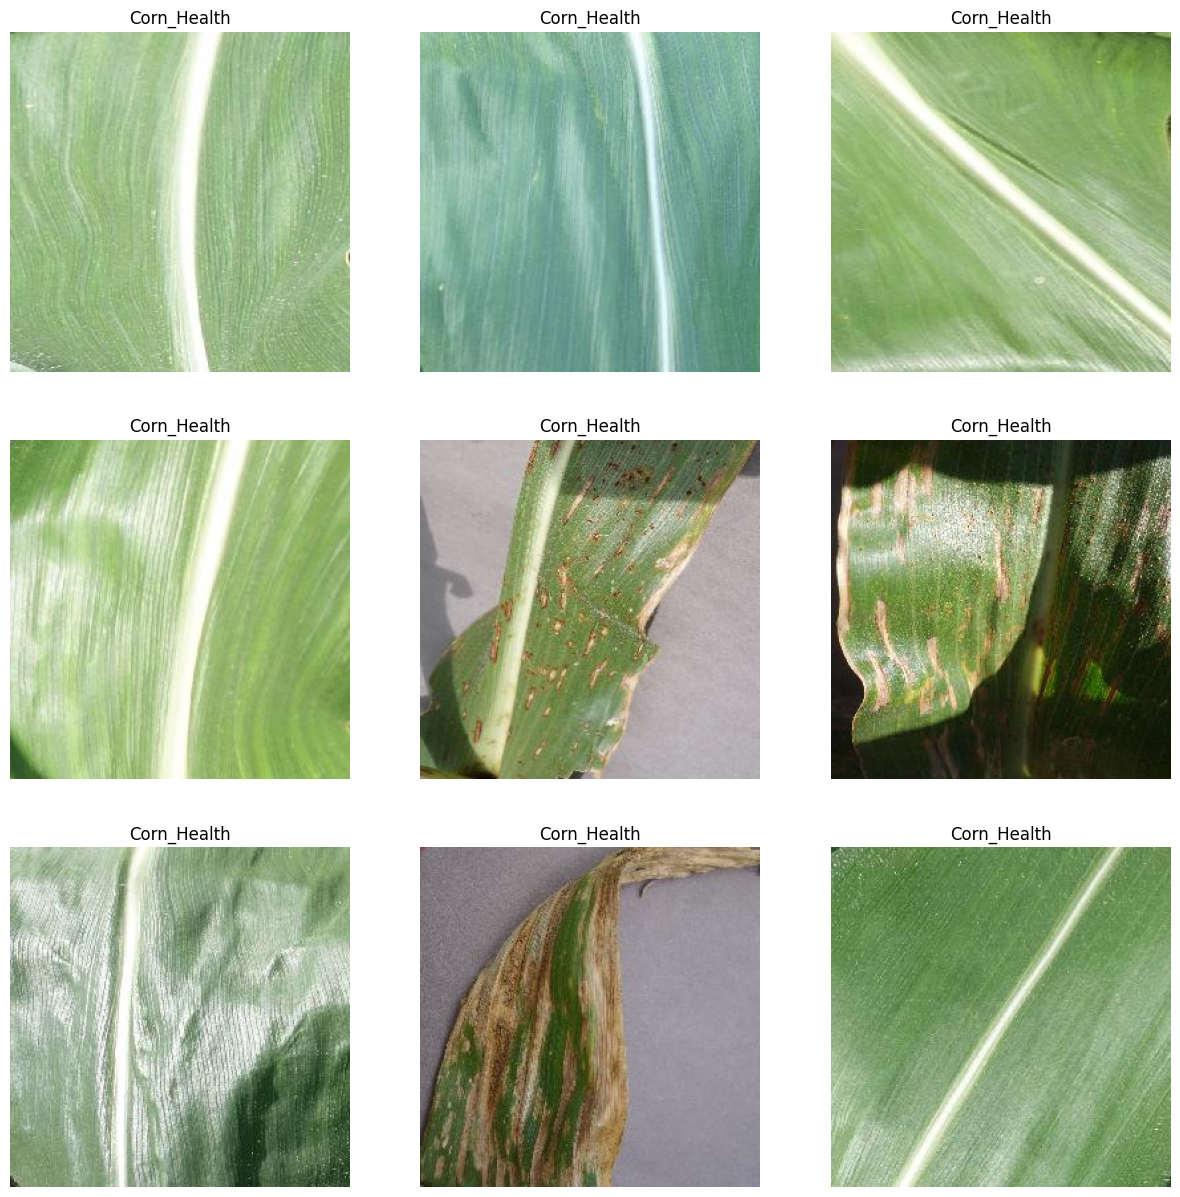

In [45]:
# visulaise the data
import os
import matplotlib.pyplot as plt
import random
from glob import glob
import cv2 

img_dir = "Dataset/data/Task A/train"
def visulise_img(img_dir):
    fig = plt.figure(figsize=(15 , 15))
    
    row, col = 3 ,3 
    img_list = random.sample(glob(img_dir + "/*/*.jpg"), k = row*col)
    
    for i in range (row*col ):  
        # img_path = random.sample(glob(img_dir + "/*/*.jpg"), k = 1)
        
        img = cv2.imread(img_list[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
     
        fig.add_subplot(row , col , i+1)
        plt.imshow(img)
        plt.title(img_list[0].split("\\")[2].split(" ")[0])
        plt.axis(False)

visulise_img(img_dir)

In [46]:
def find_classes(tagert_dir):
    if os.listdir(tagert_dir) is None:
        print("Cant return anything")
        return None
    else:
        classes = os.listdir(tagert_dir)
        cls_to_idx = dict(enumerate(classes , 0))
        cls_to_idx = {k:v for v,k in cls_to_idx.items()}
    return classes , cls_to_idx

In [47]:
# Import the classes 
from PIL import Image

class CustomeData(Dataset):
    def __init__(self, taget_dir, data_transform):
        self.img_path = glob(taget_dir+ "/*/*.jpg")
        # Transform if anything to tranform here
        self.data_tranform = data_transform
        # make claases and cls_to_idx
        self.classes , self.cls_to_idx = find_classes(taget_dir)
        
        
    def load_img(self, index):
        img = Image.open(self.img_path[index])
        return img
        
    def __len__(self):
        return len(self.img_path)
    
    def __getitem__(self, index): # return img and label
        img = self.load_img(index)
        cls = self.img_path[index].split("\\")[1]
        cls_idx = self.cls_to_idx[cls]
        
        if self.data_tranform:
            return self.data_tranform(img) , cls_idx
        else:
            return img , cls_idx
         

In [48]:
# Tranformation of data (data Argumantation)
from torchvision import transforms

train_tranform = transforms.Compose([
    transforms.Resize((64 , 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=3),
    transforms.RandomHorizontalFlip(0.4),
    transforms.ToTensor()  
])

test_tranform = transforms.Compose([
    transforms.Resize((64 , 64)),
    transforms.ToTensor()  
])

In [49]:
train_dir = "Dataset/data/task A/train"
test_dir = "Dataset/data/task A/test"

train_data = CustomeData(train_dir , train_tranform)
test_data = CustomeData(test_dir , test_tranform)

In [50]:
# Hyperparamter 
BATCH_SIZE = 16

In [51]:
# Train in dataloader
train_dataloder = DataLoader(train_data , batch_size= BATCH_SIZE , shuffle= True)
test_dataloder = DataLoader(test_data , batch_size= BATCH_SIZE , shuffle= False)


In [52]:
# img, label
for img, label in train_dataloder:
    print(img.shape)
    print(label.shape)
    break

torch.Size([16, 3, 64, 64])
torch.Size([16])


In [53]:
img_list_path = list(glob(img_dir + "/*/*.jpg"))
img_list_path[:10]

['Dataset/data/Task A/train\\Gray_Leaf_Spot\\Corn_Gray_Spot (1).jpg',
 'Dataset/data/Task A/train\\Gray_Leaf_Spot\\Corn_Gray_Spot (10).jpg',
 'Dataset/data/Task A/train\\Gray_Leaf_Spot\\Corn_Gray_Spot (100).JPG',
 'Dataset/data/Task A/train\\Gray_Leaf_Spot\\Corn_Gray_Spot (102).JPG',
 'Dataset/data/Task A/train\\Gray_Leaf_Spot\\Corn_Gray_Spot (103).JPG',
 'Dataset/data/Task A/train\\Gray_Leaf_Spot\\Corn_Gray_Spot (105).JPG',
 'Dataset/data/Task A/train\\Gray_Leaf_Spot\\Corn_Gray_Spot (106).JPG',
 'Dataset/data/Task A/train\\Gray_Leaf_Spot\\Corn_Gray_Spot (107).JPG',
 'Dataset/data/Task A/train\\Gray_Leaf_Spot\\Corn_Gray_Spot (108).JPG',
 'Dataset/data/Task A/train\\Gray_Leaf_Spot\\Corn_Gray_Spot (109).JPG']

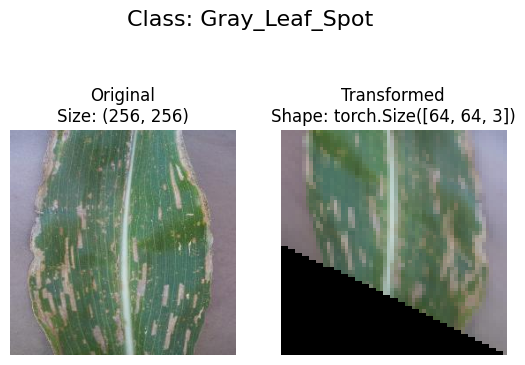

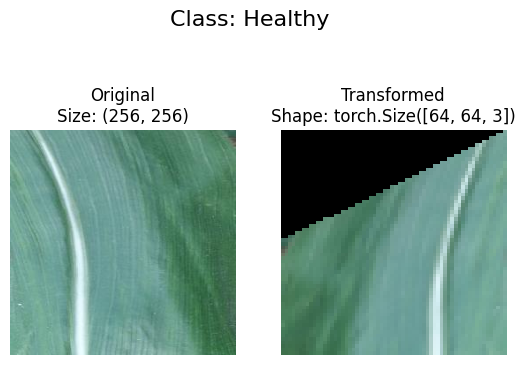

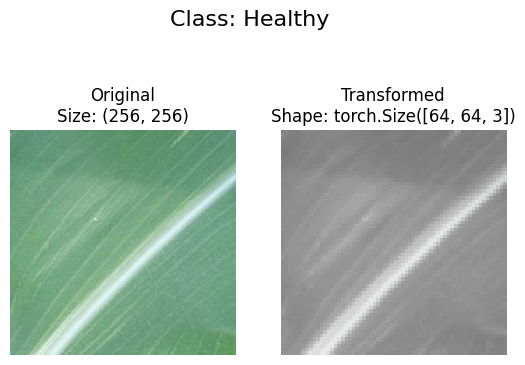

In [72]:
# Plot Random Img 
def plot_transformed_images(image_paths: list, transform, n=3):
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.split("\\")[1]}", fontsize=16)

plot_transformed_images(image_paths=img_list_path,
                        transform=train_tranform,
                        n=3)

In [73]:
# Model Building 
class CustomeCNN(nn.Module):
  def __init__(self, ):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=3,
                  out_channels=10,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=10,
                  out_channels=10,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) 
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=10,
                  out_channels=10,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=10,
                  out_channels=10,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) 
    )
    self.classifier = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(in_features=10*13*13,
                  out_features=2)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

In [55]:
# Iterators in python
# Iteration : genarl term to take each item one aftet the orther, to go over a grp of data that is interrtors
# intertor : is a obj that allow to traverse theorught sequemce of deta without having to store the entrre data in memory.

# example
x = range(1 , 100000) # --> intertor
l = [i for i in range(100000)]
import sys
print(sys.getsizeof(x)/1024)
print(sys.getsizeof(l)/1024)


0.046875
782.2109375


In [56]:
# iterbale is an obj is, which xab ve iterarte over
# it will generrate a terable obj when pass through iter()

print(type(l))
print(type(iter(l)))


<class 'list'>
<class 'list_iterator'>


In [57]:
# every iterator is also iterbales but not all interbales are itertaors
# how to recognise iterables
# 1) perfome loop and check if fails
# 2) dir(obj) find __iter__ function

dir(l) #-->  '__iter__',
dir(x) # --> has "__iter__"
dir(int(1)) # not iter


['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'as_integer_ratio',
 'bit_count',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'is_integer',
 

In [58]:
# how to find itertator
# check dir(obj) and find __iter__ and __next__

dir(iter(l))

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__length_hint__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [59]:
# How fir loop works

num = [1,2 ,3, 4]

for i in num:
    print(i)
    
# Step 1 : fetch the itertator
# calling the --> next


1
2
3
4


In [60]:
def for_loop(iterbale):
    iterbale = iter(iterbale)
    while True:
        try:
            print(next(iterbale))
        except StopIteration:
            break
    

In [61]:
a = [1,2, 3,4]
b = range(1,10)
c = (1 ,2,3)
d = (12,3,4)
e = {0:1 , 1:1}
for_loop(a)

1
2
3
4


In [62]:
num = [1,23,3,3,3,5]

print(f"Adress of iter of a iterable: {id(iter(num))})") 
print(f"Adress of iter of a iterator itself: {id(iter(iter(num)))})") 
# See same
# so iter(itertaor) == iterrator


Adress of iter of a iterable: 2149147946832)
Adress of iter of a iterator itself: 2149147946832)


In [63]:
# Make our own range
class self_range():
    def __init__(self, start , end):
        self.start = start
        self.end = end
        
    def __iter__(self):
        return self_range_iterator(self)

In [64]:
class self_range_iterator:
    def __init__(self, iterable_obj):
        self.iterable_obj = iterable_obj
        
    def __iter__(self):
        return self
    
    def __next__(self):
        
        if self.iterable_obj.start >= self.iterable_obj.end:
            raise StopIteration
        else:
            current = self.iterable_obj.start
            self.iterable_obj.start += 1
            return current    

In [65]:
for i in self_range(1 ,10):
    print(i)

1
2
3
4
5
6
7
8
9


In [66]:
# Generators : nothing but a fucntion
# To create itertarors eaisly

def get_domo(): # Remeber prevous state and resturn
    yield "first statement"
    yield "seacond statememt"
    yield "third statement"
    
gen = get_domo()

for i in gen:
    print(i)

first statement
seacond statememt
third statement


In [67]:
def square(num):
    for i in range(1 , num+1):
        yield i**2
        
ans = square(10)
next(ans)

1

In [68]:
# create range fuction 
def self_range(start , end):
     for i in range(start, end):
         yield i

In [69]:
for i in self_range(2 , 10):
    print(i)
    
# Genetaor expression
gen = (i for i in range(1,2))
for i in gen:
    print(i)

2
3
4
5
6
7
8
9
1


In [70]:
# why
# small size
# infinite stream
# chain genefators

In [71]:
# Vislusiing the 